In [1]:
import pandas as pd
import numpy as np
import tqdm
import missingno as msno
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [134]:
data = pd.read_csv('da26521-0003.tsv', sep='\t', header=0)

/home/peter/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (95,96,97,98) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [136]:
def replace_missing(x):
    
    if len(str(x)) == 1 and x in [8, 5, 9]:
            return np.nan
        
    if len(str(x)) == 2 and x in [88, 95, 98, 99, 97]:
            return np.nan
        
    if len(str(x)) == 3 and x in [888, 995, 998, 999, 98.0]:
            return np.nan
        
    if len(str(x)) == 4 and x in [88.8, 99.5, 99.8, 8888, 9995, 9998, 9999]:
            return np.nan
        
    if len(str(x)) == 5 and x in [888.8, 999.5, 999.8, 88888, 99995, 99998, 99999]:
            return np.nan
        
    if len(str(x)) == 6 and x in [8888.8, 9999.5, 9999.8]:
            return np.nan    
    
    else:
        return x

In [137]:
data = data.applymap(lambda x: replace_missing(x)).copy()

In [138]:
import tqdm
import missingno as msno

In [139]:
data['V40'].value_counts()

2.0    130149
1.0     76201
Name: V40, dtype: int64

In [140]:
def list_of_absent_data_columns(data, ratio=0.2):
    """returns list of columns whose missing values make up \
    more than a set ratio (default is half) of the data"""
    variables_list = list(data.columns)
    missing_list = []
    for variable in variables_list:
        missing_ratio = sum(data[variable].isna()) / len(data)
        if missing_ratio > ratio:
            missing_list.append(variable)
    return missing_list

In [141]:
absent_columns = list_of_absent_data_columns(data)

In [145]:
data.drop(columns=absent_columns, inplace=True)

In [144]:
def missing_vis(data):
    """Returns 4 graphics: bar chart, distributions, heatmap \
    (of correlation between nulls), and dendogram"""
    msno.bar(data);
    msno.matrix(data);
    msno.heatmap(data);
    msno.dendrogram(data);


In [149]:
data.shape

(289009, 34)

In [151]:
singular_variables = []
for col in data.columns:
#     print(col, len(set(prison_data[col])))
    if data[col].nunique() == 1:
        singular_variables.append(col)
print(singular_variables)


['V1', 'V2', 'V3', 'V5', 'V54', 'V95']


In [153]:
data.drop(columns = singular_variables, inplace=True)

In [157]:
data.columns

Index(['V4', 'V8', 'V9', 'V10', 'V15', 'V24', 'V25', 'V26', 'V32', 'V33',
       'V34', 'V46', 'V48', 'V51', 'V55', 'V56', 'V57', 'V58', 'V59', 'V62',
       'V67', 'V70', 'V71', 'V94', 'V96', 'V97', 'V98', 'V99'],
      dtype='object')

In [156]:
data.head()

,V4,V8,V9,V10,V15,V24,V25,V26,V32,V33,...,V59,V62,V67,V70,V71,V94,V96,V97,V98,V99
0,1.0,1949.0,1.0,2.0,2002.0,28.1,0.0,410.0,410.0,120.0,...,55.6,14.2,12.0,2.0,0,1.0,000809,999998,999998,000809
1,2.0,1948.0,1.0,2.0,2000.0,8.8,0.0,190.0,540.0,180.0,...,55.6,44.8,6.1,2.0,2,1.0,000103,000490,999998,000490
2,3.0,1943.0,1.0,2.0,2000.0,10.4,0.0,270.0,270.0,180.0,...,61.1,41.4,7.1,2.0,0,1.0,000212,999998,999998,000212
3,4.0,1948.0,1.0,2.0,1984.0,1.6,0.0,410.0,370.0,240.0,...,55.9,102.0,136.3,2.0,2,1.0,000809,000808,000252,000808
4,NaN,1950.0,1.0,2.0,NaN,0.0,247.7,10.0,10.0,99999.6,...,53.7,NaN,179.1,2.0,2,1.0,000003,000105,999998,000003


In [159]:
data.shape

(289009, 28)

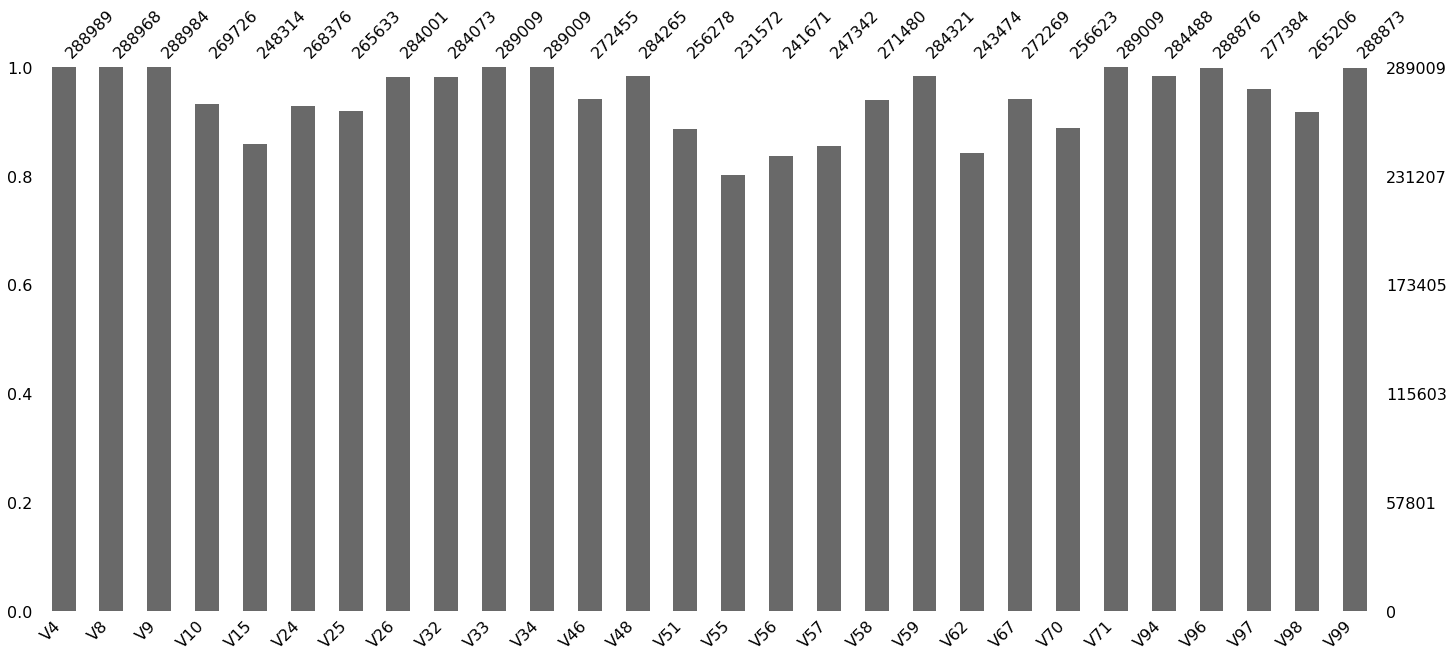

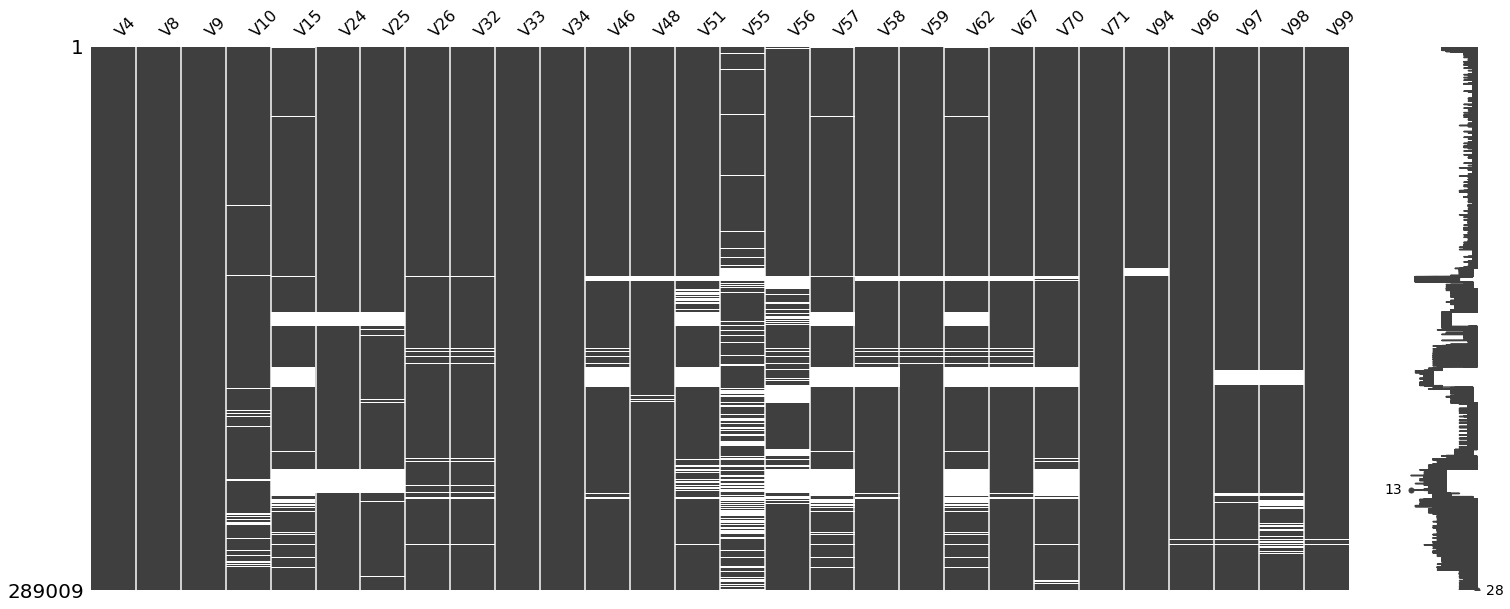

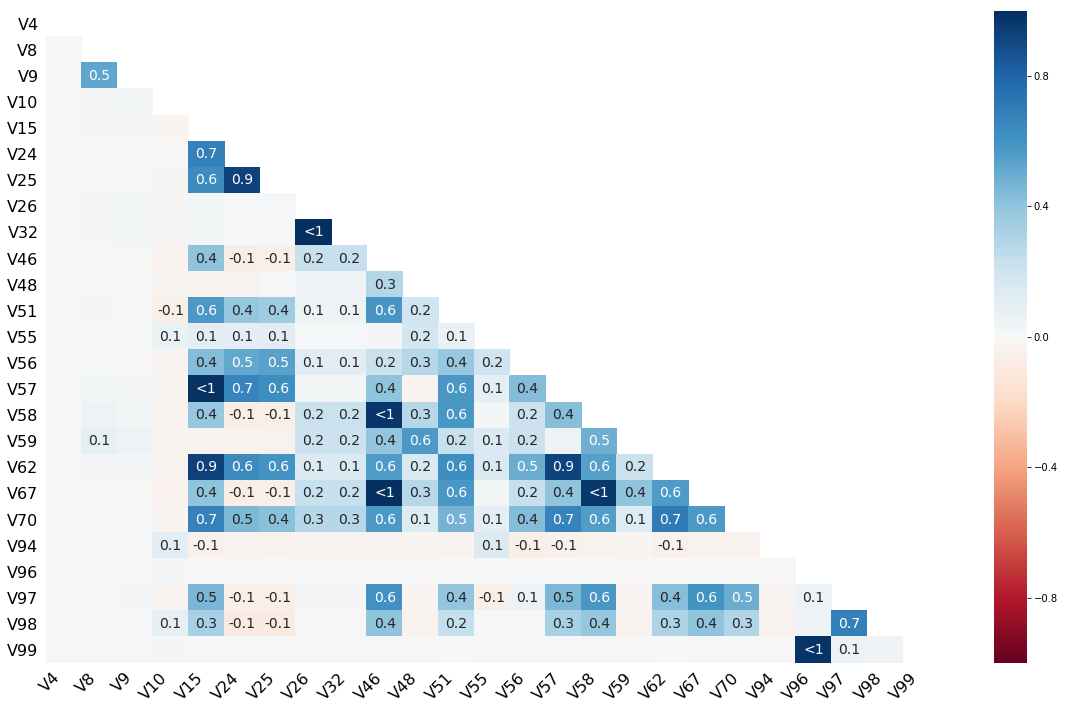

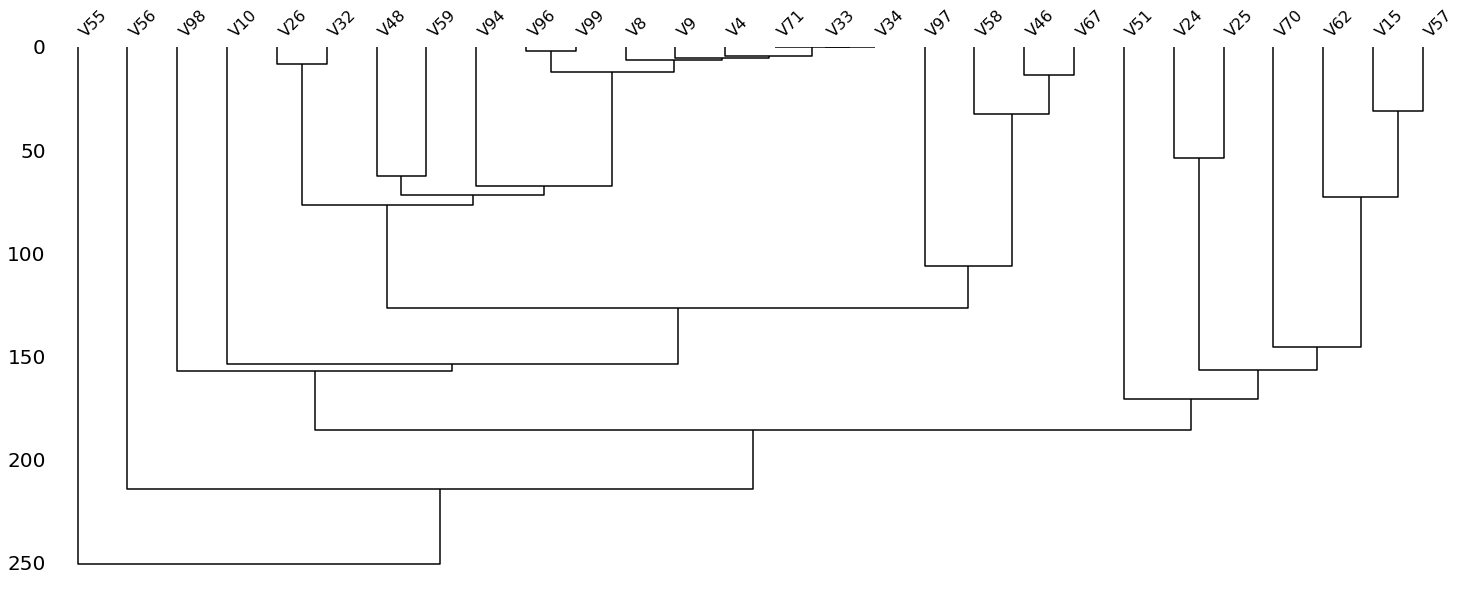

In [158]:
missing_vis(data)

In [163]:
data = data.dropna()

In [173]:
data_clean = data[data['V55'] != 10].copy()

In [174]:
data_clean['outcome'] = data_clean['V55'].map(lambda x: 1 if x == 1 else 0)

In [176]:
data_clean['outcome'].value_counts()

1    80565
0    79714
Name: outcome, dtype: int64

In [178]:
data_clean.drop(columns='V55', inplace=True)

In [185]:
data_clean.drop(columns=['V96', 'V97', 'V98', 'V99'], inplace=True)

In [197]:
data_clean.columns

Index(['V4', 'V8', 'V9', 'V10', 'V15', 'V24', 'V25', 'V26', 'V32', 'V33',
       'V34', 'V46', 'V48', 'V51', 'V56', 'V57', 'V58', 'V59', 'V62', 'V67',
       'V70', 'V71', 'V94', 'outcome'],
      dtype='object')

## Baseline Model

In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [187]:
X = data_clean.drop(columns='outcome')
y = data_clean['outcome']

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [189]:
rfc = RandomForestClassifier(n_estimators=100)

In [190]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Random Forest Classifier Training

In [191]:
y_train_pred = rfc.predict(X_train)

In [192]:
confusion_matrix(y_train, y_train_pred)

array([[59737,     1],
       [    0, 60471]])

In [193]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59738
           1       1.00      1.00      1.00     60471

   micro avg       1.00      1.00      1.00    120209
   macro avg       1.00      1.00      1.00    120209
weighted avg       1.00      1.00      1.00    120209



#### Random Forest Classifier Testing

In [194]:
y_test_pred = rfc.predict(X_test)

In [195]:
confusion_matrix(y_test, y_test_pred)

array([[18598,  1378],
       [ 2745, 17349]])

In [196]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     19976
           1       0.93      0.86      0.89     20094

   micro avg       0.90      0.90      0.90     40070
   macro avg       0.90      0.90      0.90     40070
weighted avg       0.90      0.90      0.90     40070

